In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Executive Dashboard Creation

In [53]:
# Read data
customers = pd.read_csv("./Data/customers_wk9_thurs.csv")
products = pd.read_csv("./Data/products_wk9_thurs.csv")
sales = pd.read_csv("./Data/sales_wk9_thurs.csv")

In [54]:
# Convert Datetime columns
customers["registration_date"] = pd.to_datetime(customers["registration_date"])
products["launch_date"] = pd.to_datetime(products["launch_date"])
sales["transaction_date"] = pd.to_datetime(sales["transaction_date"])

In [55]:
# Chart 1 Data
chart1_data = pd.merge(sales,products[["product_id","category"]], on = "product_id", how = "left")
chart1_data = chart1_data[["category","total_amount"]].groupby('category').sum('total_amount').sort_values("total_amount", ascending = False).reset_index()
chart1_data = chart1_data.rename(columns = {"category":"Category","total_amount":"Total Revenue ($)"})

In [56]:
# Chart 2 Data
chart2_data = customers['state'].value_counts().sort_values().reset_index()
chart2_data = chart2_data.rename(columns = {"state":"State","count":"Count"})

In [57]:
sales["dow"] = sales["transaction_date"].dt.day_name()

In [58]:
# Chart 3 Data
chart3_data = sales[["dow","total_amount"]].groupby("dow").mean().reset_index().sort_values("dow")
# Set up Day of Week order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Assign Order Type
order_type = pd.CategoricalDtype(categories=day_order, ordered=True)
# Change type of Day of Week
chart3_data['dow'] = chart3_data['dow'].astype(order_type)
chart3_data = chart3_data.sort_values(by='dow')
# Rename Columns
chart3_data = chart3_data.rename(columns = {"dow":"Day of Week","total_amount":"Average Revenue ($)"})

In [59]:
# Chart 4 Data
mean_value = sales['total_amount'].mean()

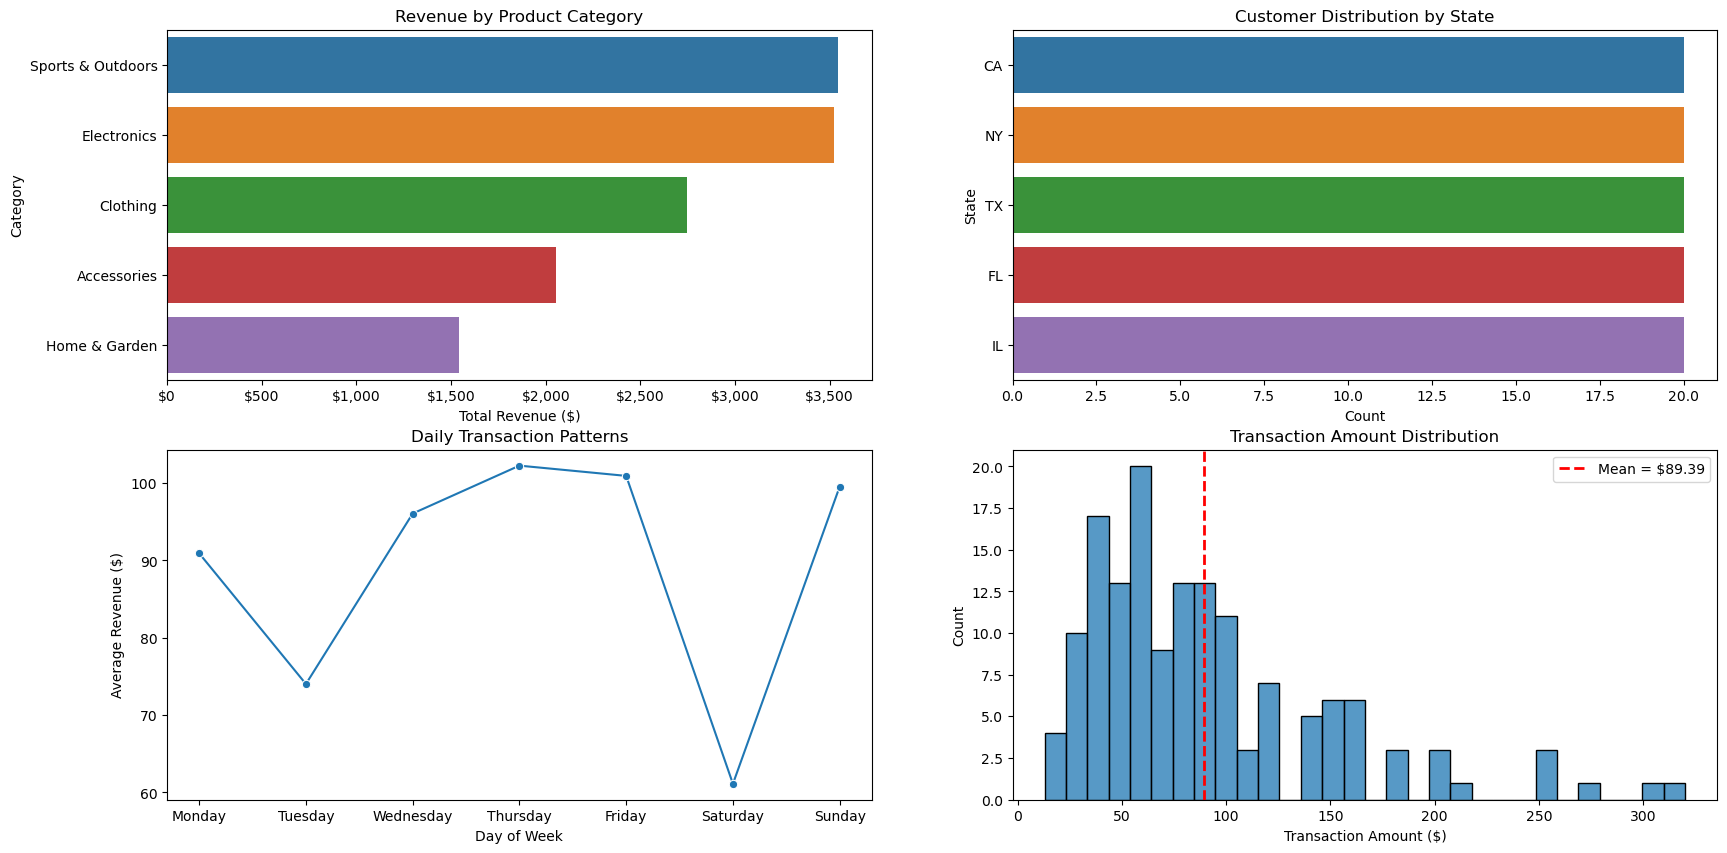

In [60]:
# Create custom 2x2 subplot layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

# Chart 1
sns.barplot(data = chart1_data, y = 'Category', x = 'Total Revenue ($)', ax = ax1)
ax1.set_title('Revenue by Product Category')
ax1.xaxis.set_major_formatter('${x:,.0f}')

# Chart 2
sns.barplot(data = chart2_data, x = 'Count', y = 'State', ax = ax2)
ax2.set_title('Customer Distribution by State')

# Chart 3
sns.lineplot(data = chart3_data, x = 'Day of Week', y = 'Average Revenue ($)', marker = 'o',  markers=True  ,ax = ax3)
ax3.set_title('Daily Transaction Patterns')

# Chart 4
sns.histplot(data = sales, x = 'total_amount', multiple = 'stack', bins = 30 , ax = ax4)
ax4.set_title('Transaction Amount Distribution')
ax4.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean = ${mean_value:.2f}')
ax4.set_xlabel("Transaction Amount ($)")
ax4.legend()

# Data Preparation Challenge

In [75]:
#.1
customers['full_name'] = customers['first_name'] + ' ' + customers['last_name']
customer_spending = pd.merge(sales,customers, how = 'left' , on = 'customer_id')

In [76]:
#.2 - Total Spending
customer_spending[['full_name','total_amount']].groupby('full_name').sum('total_amount')

,total_amount
full_name,
Amanda White,128.96
Amy Nelson,145.95
Andrew Lewis,81.98
Angela Phillips,98.97
Annie Washington,59.99
...,...
Steven Perez,201.95
Thomas Sanchez,139.96
Virginia Hughes,159.98


In [77]:
#.2 - Purchase Counts
customer_spending['full_name'].value_counts()

full_name
John Smith          2
Amy Nelson          2
Laura Mitchell      2
Steven Perez        2
Michelle Roberts    2
                   ..
Arthur Sanders      1
Julie Kelly         1
Roger Brooks        1
Martha Watson       1
Frances Hayes       1
Name: count, Length: 90, dtype: int64

In [80]:
#.3 
def classify_age(age):
    if age < 30:
        return 'under 30'
    elif 30 <= age < 45:
        return '30-45'
    elif 45 <= age < 60:
        return '45-60'
    else:
        return 'Over 60'

In [81]:
customer_spending['age_group'] = customer_spending['age'].apply(classify_age)

In [85]:
#4
customer_spending.fillna(0)

,sale_id,customer_id,product_id,transaction_date,quantity,total_amount,dow,first_name,last_name,age,state,income,registration_date,email,full_name,age_group
0,1,1,1,2022-02-10 14:30:00,1,79.99,Thursday,John,Smith,34,CA,75000,2022-01-15,john.smith@email.com,John Smith,30-45
1,2,2,3,2022-02-15 10:15:00,2,39.98,Tuesday,Sarah,Johnson,28,NY,82000,2022-01-22,sarah.johnson@email.com,Sarah Johnson,under 30
2,3,3,5,2022-02-20 16:45:00,1,34.99,Sunday,Michael,Brown,45,TX,95000,2022-02-03,michael.brown@email.com,Michael Brown,45-60
3,4,4,2,2022-02-25 11:20:00,3,74.97,Friday,Emily,Davis,31,FL,68000,2022-02-14,emily.davis@email.com,Emily Davis,30-45
4,5,5,4,2022-03-01 13:10:00,1,89.99,Tuesday,David,Wilson,52,IL,110000,2022-02-28,david.wilson@email.com,David Wilson,45-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,86,30,2024-02-15 15:20:00,1,34.99,Thursday,Kathryn,Alexander,27,CA,66000,2023-09-29,kathryn.alexander@email.com,Kathryn Alexander,under 30
146,147,87,32,2024-02-20 11:30:00,3,83.97,Tuesday,Harold,Russell,48,NY,99000,2023-10-06,harold.russell@email.com,Harold Russell,45-60
147,148,88,34,2024-02-25 13:45:00,2,109.98,Sunday,Sara,Griffin,35,TX,81000,2023-10-13,sara.griffin@email.com,Sara Griffin,30-45
148,149,89,36,2024-03-01 16:15:00,1,29.99,Friday,Arthur,Diaz,43,FL,92000,2023-10-20,arthur.diaz@email.com,Arthur Diaz,30-45


In [121]:
#Group data
customer_spending_sum = customer_spending[['full_name','income','age_group','total_amount']].groupby(['age_group','full_name','income']).sum('total_amount').reset_index()

In [123]:
# Create target spending and high income thresholds
median_income = customer_spending_sum['income'].median()
median_spending = customer_spending_sum['total_amount'].median()

In [171]:
# Find top performing group
top_group = customer_spending_sum.groupby('age_group')['total_amount'].sum().idxmax()

Text(0.03, 0.9, 'CustomerCounts: 90')

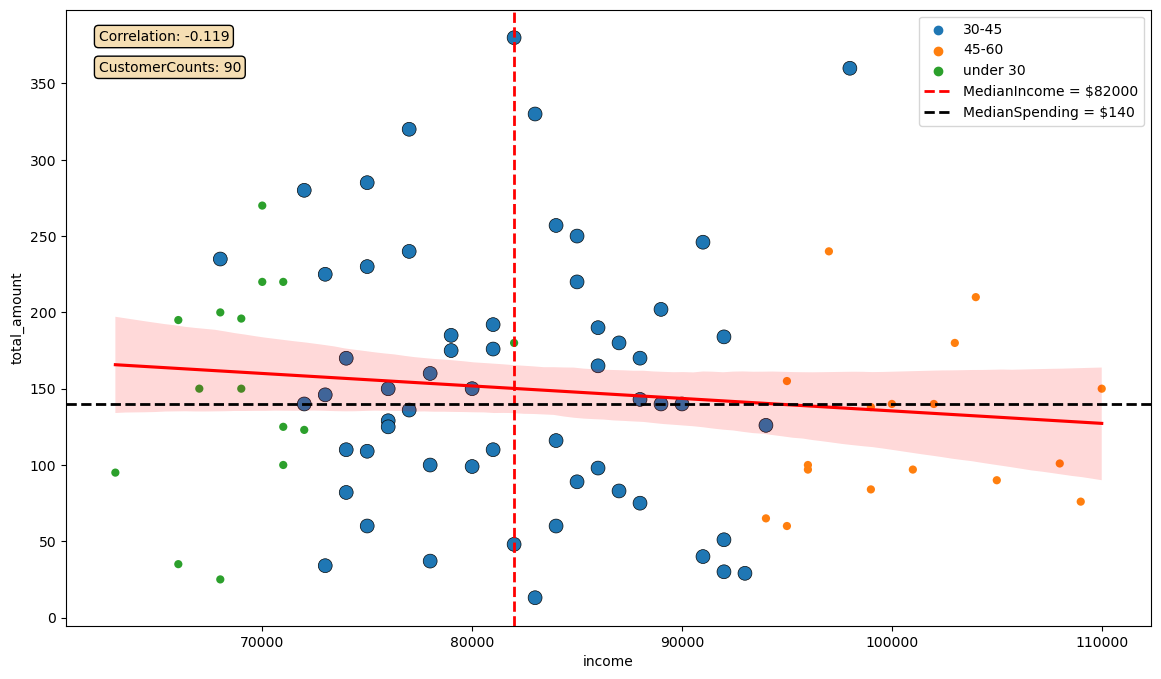

In [174]:
# Create a plot to combine layers
fig, ax = plt.subplots(figsize=(14,8))
# Layer 1
markers = {"under 30":"s","30-45":"s","45-60":"X"}
sns.scatterplot(data = customer_spending_sum, x = 'income', y = 'total_amount', hue = 'age_group',
                s=customer_spending_sum['age_group'].apply(lambda x: 100 if x == top_group else 35), # Layer 5 is here
                ax = ax)
# Layer 2
sns.regplot(data=customer_spending_sum, x='income', y='total_amount', scatter=False, 
            color='red', ax=ax)
# Layer 3
ax.axvline(median_income, color='red', linestyle='--', linewidth=2, label=f'MedianIncome = ${median_income:.0f}')
ax.axhline(median_spending, color='black', linestyle='--', linewidth=2, label=f'MedianSpending = ${median_spending:.0f}')
ax.legend()
# Layer 4
ax.text(0.03, 0.95, f'Correlation: {customer_spending_sum["income"].corr(customer_spending_sum["total_amount"]):.3f}', 
        transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))
ax.text(0.03, 0.9, f'CustomerCounts: {customer_spending["full_name"].nunique():.0f}', 
        transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))
# Layer 5
# Make top group from age group size to be appeared bigger